In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap
from scipy.special import expit
from sklearn import svm

In [ ]:
def IRLS(X, y, delta=1e-4, n_iter=20, tol=1e-3):
    n_samples, n_features = X.shape
    # y.shape (n_samples, n_features) n_feature=1?
    y=y.reshape((n_samples,))
    #print(y.shape)
    delta = delta * np.ones((y.shape))
    w_init = 1
    w = w_init * np.ones((y.shape)).reshape((-1,))
    W = np.diag(w)
    
    #print("W shape",W.shape)
    #print("w shape",w.shape)
    beta = np.dot(np.linalg.inv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),y))
    # beta shape 
    for i in range(n_iter):
        #w_=w
        print("iteration {}".format(i))
        beta_old=beta
        w = 1/(np.maximum(delta,np.absolute(y-np.dot(X,beta)))).reshape((-1,))
        W = np.diag(w)
        #print(w.shape)
        #print(W.shape)
        beta = np.dot(np.linalg.inv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),y))
        #print("beta shape",beta.shape)
        tolerance = np.sum(np.absolute(beta-beta_old))
        print("tolerance is {}".format(tolerance))
        if tolerance < tol and i >1:
            break
    return beta.reshape((-1,1))



In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=1)
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
beta = IRLS(X,y)
#y_n = expit(y)

In [ ]:
# """
# input_str = '''2 7
# 0.18 0.89 109.85
# 1.0 0.26 155.72
# 0.92 0.11 137.66
# 0.07 0.37 76.17
# 0.85 0.16 139.75
# 0.99 0.41 162.6
# 0.87 0.47 151.77
# 4
# 0.49 0.18 105.22
# 0.57 0.83 142.68
# 0.56 0.64 132.94
# 0.76 0.18 129.71
# '''

# input_list = input_str.split('\n')

# p,n = [ int(i) for i in input_list.pop(0).split() ]
# X = np.empty( [n, p+1] )
# X[:,0] = np.repeat( 1, n)
# y = np.empty( [n, 1] )
# for i in range(n):
#     l = [ float(i) for i in input_list.pop(0).split() ]
#     X[i, 1:] = np.array( l[0:p] )
#     y[i] = np.array( l[p] )

# n = [ int(i) for i in input_list.pop(0).split() ][0]
# X_new = np.empty( [n, p+1] )
# X_new[:,0] = np.repeat( 1, n)
# y_new = np.empty( [n, 1] )
# for i in range(n):
#     l = [ float(i) for i in input_list.pop(0).split() ]
#     X_new[i, 1:] = np.array( l[0:p] )
#     y_new[i] = np.array( l[p] )
# B = IRLS(y=y,X=X, n_iter=100)
# abs_error = abs( y_new - X_new.dot(B) )
# print(abs_error)
# """

In [ ]:
# """
# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            random_state=1, n_clusters_per_class=1)
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# beta = IRLS(X,y)
# y_new = np.dot(X,beta).reshape((-1,))
# print(y.shape)
# print(y_new.shape)
# print(mean_squared_error(y,np.dot(X,beta)))
# cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# plt.scatter(X[:,0], X[:,1],c=y, cmap=cm_bright,
#                edgecolors='k', label='data')
# plt.figure()
# plt.scatter(X[:,0], X[:,1],c=y_new, cmap=cm_bright,
#                edgecolors='k', label='data')
# """

In [ ]:
import numpy as np
from rvm import *
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import expit
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin
from sklearn.metrics.pairwise import rbf_kernel,linear_kernel
from sklearn.metrics import mean_squared_error
from sklearn.utils.validation import check_X_y
from sklearn.svm import SVR
#from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3, load_boston
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_gaussian_quantiles, make_circles
from scipy.optimize import minimize
import time
from sklearn import svm

In [16]:
#Train = np.loadtxt('Pima_train.txt')
#Train = np.loadtxt('pima-indians-diabetes.data.txt')
Train = np.loadtxt('synth.tr.txt')
#print(Train.shape)
#print(Train.shape)
X=np.zeros((Train.shape[0],Train.shape[1]-1))
y=np.zeros((Train.shape[0],1))
for i in range(Train.shape[1]-1):
    X[:,i]=Train[:,i]
#X[:,0]=Train[:,0]
#X[:,1]=Train[:,1]
y=Train[:,-1]
#print(y)
np.random.seed(2)
idx = np.random.choice(X.shape[0],200,replace=False)
X = X[idx]
y = y[idx]
print(X.shape)
#print(np.sort(X))

Test = np.loadtxt('synth.te.txt')    
#Test = np.loadtxt('Pima_test.txt')    
X_test=np.zeros((Test.shape[0],Train.shape[1]-1))
y_test=np.zeros((Test.shape[0],1))
for i in range(Train.shape[1]-1):
    #X_test[:,i]=Train[:,i]
    X_test[:,i]=Test[:,i]
#X[:,0]=Train[:,0]
#X[:,1]=Train[:,1]
y_test=Test[:,-1]
#idx = np.random.choice(X_test.shape[0],200,replace=False)
idx = np.random.choice(X_test.shape[0],200,replace=False)
X_test = X_test[idx]
y_test = y_test[idx]
print(X_test.shape)






(200, 2)
(200, 2)


In [ ]:
# # scaling problem

# # Train = np.loadtxt('Pima_train.txt')   ## 200 ---- 23.74s
# # Train = np.append(Train,Train,axis=0)
# # Train = np.append(Train,Train,axis=0)
# # X=np.zeros((Train.shape[0],Train.shape[1]-1))
# # y=np.zeros((Train.shape[0],1))
# # for i in range(Train.shape[1]-1):
# #     X[:,i]=Train[:,i]
# # y=Train[:,-1]

# # np.random.seed(2)
# # idx = np.random.choice(X.shape[0],600)
# # #idx = np.random.choice(X.shape[0],X.shape[0],replace=False)
# # X = X[idx]
# # y = y[idx]
# # print(X.shape)
 
# # Test = np.loadtxt('Pima_test.txt')   
# # Test = np.append(Test,Test,axis=0)
# # Test = np.append(Test,Test,axis=0)
# # X_test=np.zeros((Test.shape[0],Train.shape[1]-1))
# # y_test=np.zeros((Test.shape[0],1))
# # for i in range(Train.shape[1]-1):
    
# #     X_test[:,i]=Test[:,i]
# # y_test=Test[:,-1]

# # idx = np.random.choice(X_test.shape[0],600)
# # #idx = np.random.choice(X_test.shape[0],X_test.shape[0],replace=False)
# # X_test = X_test[idx]
# # y_test = y_test[idx]
# # print(X_test.shape)



# N=200

# X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
# print(X.shape)  
# # N = 1000 time = 87.5 s
# # N = 200 time =24.7 s
# # N = 400 time = 61.4 s

In [17]:
#initialization

# rbf_gamma=0.0028                 # # Pima    Errors    vectors, 0.5: 0
# threshold_dif = 1e-3
# alpha=1e-3
# beta=1.e-3
# threshold_alpha=0.13
# n_iter = 100000
# n_iter_posterior=20

# rbf_gamma=0.002                 # # Pima   69 Errors   8 vectors, 0.5: 0
# threshold_dif = 1e-3
# alpha=100
# beta=1.
# threshold_alpha=1e12
# n_iter = 10000
# n_iter_posterior=200

# rbf_gamma=0.0029                  # vectors 9, error 70, 0.5: 0
# threshold_dif = 1e-3
# alpha=1e-3
# beta=1.e-3
# threshold_alpha=0.2
# n_iter = 100000
# n_iter_posterior=20

# rbf_gamma=0.009                  # vectors :14, error: 70, 0.5: 0
# threshold_dif = 1e-3
# alpha=1e-3
# beta=1.e-3
# threshold_alpha=0.4
# n_iter = 100000
# n_iter_posterior=20

rbf_gamma=0.5                  #synth Ripley 1996   Error rate for test 10.2%
threshold_dif = 1e-3
alpha=1e-1
beta=1.e1

threshold_alpha=1e9
n_iter = 5000
n_iter_posterior=20

n_samples1,n_features = X.shape
phi = rbf_kernel(X, X, rbf_gamma)
    
X, y = check_X_y(X, y)
relevance = X
y_ = y
y_old=y
n_basis_functions = phi.shape[1]
mu_ = 1e-1*np.random.rand(n_basis_functions)  
#mu_ = np.ones(n_basis_functions) 
#mu_ = np.zeros(n_basis_functions) 
print(mu_.shape)
#mu_ = np.zeros(n_basis_functions) ## w_mp
alpha_ = alpha * np.ones(n_basis_functions)
beta_ = beta * np.ones(n_basis_functions)
#alpha_ = alpha * np.random.rand(n_basis_functions)  
#beta_ = beta *np.random.rand(n_basis_functions)  

alpha_old = alpha_
#sigma_ = np.linalg.inv(np.dot(np.dot(phi.T,np.diag(beta_)),phi))
def log_posterior(mu_, alpha, phi, t):
    y_n = expit(np.dot(phi,mu_))
    log_p = -1 * (np.sum(np.log(y_n[t==1]),0) + np.sum(np.log(1-y_n[t==0]), 0))
    log_p += 0.5 * np.dot(np.dot(mu_.T, np.diag(alpha)),mu_)
    jacobian = np.dot(np.diag(alpha),mu_) - np.dot(phi.T,(t-y_n))
    return log_p,jacobian
def hessian(mu,alpha_,phi,t):
    B = np.diag(expit(np.dot(phi, mu_)) * (1- expit(np.dot(phi, mu_))))
    return np.diag(alpha_) + np.dot(np.dot(phi.T,B),phi)
start =time.time()   
#update
for i in range(n_iter):
    #print(i)
    # posterior
    
    result = minimize(
        fun = log_posterior,
        hess = hessian,
        x0 = mu_,
        args = (alpha_, phi, y_),
        method = 'Newton-CG',
        jac=True,
        options = {'maxiter':n_iter_posterior })
    mu_ = result.x # w_mp
    
   
    
    #sigma_ = np.linalg.inv(np.diag(alpha_) + np.dot(np.dot(phi.T,B),phi) )
    #sigma_= np.linalg.inv(hessian(mu_,alpha_,phi,y_))
#     B = np.diag(expit(np.dot(phi, mu_)) * (1- expit(np.dot(phi, mu_))))
#     print(B.shape)
#     mu_ = np.dot(np.dot(np.dot(sigma_ ,phi.T),B),y_)
    
    
    sigma_= np.linalg.inv(hessian(mu_,alpha_,phi,y_))
    #B = np.diag(expit(np.dot(phi, mu_)) * (1- expit(np.dot(phi, mu_))))
    #mu_ = np.dot(np.dot(np.dot(sigma_ ,phi.T),B),y_)
    
    # update gamma, alpha,beta
    gamma = 1 - alpha_ * np.diag(sigma_)
    alpha_ = gamma/(mu_ ** 2)
    #beta_ = ()
    # prune
    keep_alpha = alpha_ < threshold_alpha
    
    relevance = relevance[keep_alpha]
    alpha_ = alpha_[keep_alpha]
    alpha_old=alpha_old[keep_alpha]
    gamma = gamma[keep_alpha]
    phi = phi[:,keep_alpha]
    sigma_ = sigma_[np.ix_(keep_alpha,keep_alpha)]
    mu_ = mu_[keep_alpha]
    y_old = y_old[keep_alpha]
    #print("mu is : {}".format(mu_))
    #print(alpha_)
#     if (np.remainder(i,1)==0 and i>0):
#         print(i)
#         phi_new = rbf_kernel(X_test,relevance,rbf_gamma)
        
#         y_p = expit(np.dot(phi_new,mu_))
#         print(np.amax(np.dot(phi_new,mu_)))
#         print(np.amax(y_p))
#         #phi_new = rbf_kernel(X_test,relevance)
#         #y_p = expit(np.dot(phi_new,mu_))
#         #print(mu_)
#         #print(np.dot(phi_new,mu_))
        #print(y_p)
    delta = np.amax(np.absolute(alpha_-alpha_old))
    if delta < threshold_dif and i > 1:
        print("iteration is ",i)
        break
    
    #print("iteration is ",i)
    alpha_old=alpha_

#y_test=Train[:,-1]
#print(y)
#np.random.seed(1)
#idx = np.random.choice(X.shape[0],100,replace=False)
#X = X[idx]
#y = y[idx]
end = time.time()
print('The running time is',end-start)
print("The length of the relevance is",relevance.shape[0])
print("The iteration is",i)    

(200,)
iteration is  69
The running time is 5.925346851348877
The length of the relevance is 2
The iteration is 69


/home/xyperic/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:66: RuntimeWarning: divide by zero encountered in log


In [26]:
#predict
#X_test, y_test = make_classification(n_samples=N, n_features=2, n_redundant=0, n_informative=2,random_state=2, n_clusters_per_class=1)
phi_new = rbf_kernel(X_test,relevance,rbf_gamma)
#print(X_test)
#print(relevance)
y_p = expit(np.dot(phi_new,mu_))
#print("max phi_new is",np.amax(phi_new))
num_half = np.zeros(y_p.shape[0])
num_half[y_p==0.5]=1
#print("the numbers of 0.5:",sum(num_half))
res = np.empty(y_p.shape[0])
res[y_p>=0.5]=1 # red
res[y_p<=0.5]=0 # blue
#print(res)
#res[y_p>=0.5]=1
#print(res)
# res = np.zeros(y_p.shape[0])
# res[y_p<=0.5]=0
# res[y_p>=0.5]=1

svr_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=15)
y_rbf = svr_rbf.fit(X, y).predict(X_test)
MSE_svc=np.sum(np.abs(y_test-y_rbf))
print("SVC numbers of errors:",MSE_svc)
print("The length of the support vectors is",svr_rbf.support_vectors_.shape[0])
print("The error rate SVC is",100*MSE_svc/y_p.shape[0],"%")

#print("is {}",y_p)
#res = np.ones(y_p.shape[0])
#print("predict y is",res)
print("The length of the test set is",y_p.shape)
MSE=np.sum(np.abs(y_test-res))
print("RVC numbers of errors:",MSE)
#print(np.abs(y_test-res))
print("The length of the relevance is",relevance.shape[0])
print("The error rate RVC is",100*MSE/y_p.shape[0],"%")

SVC numbers of errors: 19.0
The length of the support vectors is 78
The error rate SVC is 9.5 %
The length of the test set is (200,)
RVC numbers of errors: 18.0
The length of the relevance is 2
The error rate RVC is 9.0 %


(200,)


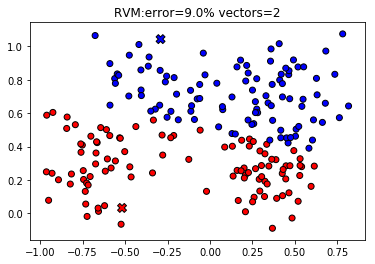

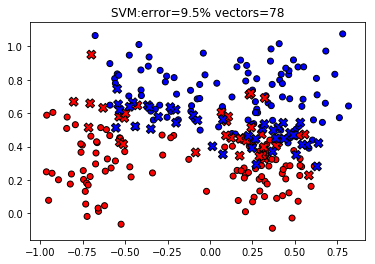

In [30]:

# plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')
# plt.title('Training data')
plt.figure()
#plt.scatter(X[:, 0], X[:, 1], c=y_rvc,cmap=cm_bright,edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=res,cmap=cm_bright,edgecolors='k')
plt.scatter(relevance[:, 0], relevance[:, 1],s=80,c=y_old, cmap=cm_bright,marker="X", alpha=1,edgecolors='k')
plt.title('RVM:error=9.0% vectors=2')
plt.legend()
plt.figure()
#plt.figure()
#plt.scatter(X[:, 0], X[:, 1], c=y_rvc,cmap=cm_bright,edgecolors='k')
print(y_rbf.shape)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_rbf,cmap=cm_bright,edgecolors='k')
plt.scatter(svr_rbf.support_vectors_[:, 0], svr_rbf.support_vectors_[:, 1],s=80,c= y[svr_rbf.support_]   , cmap=cm_bright,marker="X", alpha=1,edgecolors='k')
plt.title('SVM:error=9.5% vectors=78')
plt.legend()

In [ ]:
arr = np.arange(9).reshape((3, 3))
print(arr)
np.random.shuffle(arr)             
print(arr)

In [29]:
relevance[:, 0]

array([-0.51788734, -0.29096564])

In [ ]:



rbf_gamma=0.5                  #synth Ripley 1996   Error rate for test 10.2%
threshold_dif = 1e-3
alpha=1e-3
beta=1.e-3
threshold_alpha=1e10
n_iter = 1000
n_iter_posterior=20

n_samples1,n_features = X.shape
phi = rbf_kernel(X, X, rbf_gamma)
    
X, y = check_X_y(X, y)
relevance = X
y_ = y
y_old=y
n_basis_functions = phi.shape[1]
#mu_ = 1*np.random.rand(n_basis_functions)  
mu_ = 1e-1*np.ones(n_basis_functions) 
#mu_ = np.zeros(n_basis_functions) 
print(mu_.shape)
#mu_ = np.zeros(n_basis_functions) ## w_mp
alpha_ = alpha * np.ones(n_basis_functions)
beta_ = beta * np.ones(n_basis_functions)
#alpha_ = alpha * np.random.rand(n_basis_functions)  
#beta_ = beta *np.random.rand(n_basis_functions)  

alpha_old = alpha_
#sigma_ = np.linalg.inv(np.dot(np.dot(phi.T,np.diag(beta_)),phi))
def log_posterior(mu_, alpha, phi, t):
    y_n = expit(np.dot(phi,mu_))
    log_p = -1 * (np.sum(np.log(y_n[t==1]),0) + np.sum(np.log(1-y_n[t==0]), 0))
    log_p += 0.5 * np.dot(np.dot(mu_.T, np.diag(alpha)),mu_)
    jacobian = np.dot(np.diag(alpha),mu_) - np.dot(phi.T,(t-y_n))
    return log_p,jacobian
def hessian(mu,alpha_,phi,t):
    B = np.diag(expit(np.dot(phi, mu_)) * (1- expit(np.dot(phi, mu_))))
    return np.diag(alpha_) + np.dot(np.dot(phi.T,B),phi)
    
#update
for i in range(n_iter):
    print(i)
    # posterior
    
#     result = minimize(
#         fun = log_posterior,
#         hess = hessian,
#         x0 = mu_,
#         args = (alpha_, phi, y_),
#         method = 'Newton-CG',
#         jac=True,
#         options = {'maxiter':n_iter_posterior })
#     mu_ = result.x # w_mp
    y_n = expit(np.dot(phi,mu_))
    #print(mu_)
    #print(np.dot(phi,mu_))
    #B = np.diag(y_n *(1-y_n))
    #print(B)
    #B = np.diag(expit(np.dot(phi, mu_)) * (1- expit(np.dot(phi, mu_))))
    #z = np.dot(phi, mu_) - np.dot(np.linalg.inv(B),(y_n-y_))
    #mu_ = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(phi.T,B),phi) + np.diag(alpha_)),phi.T),B),z)
    #print(alpha_)
    #print(y_.shape)
    #print(y_n.shape)
    
    sigma_= np.linalg.inv(hessian(mu_,alpha_,phi,y_))
    mu_ = np.dot(np.dot(np.linalg.inv(np.diag(alpha_)),phi.T),(y_n-y_))
    #print(mu_.shape)
    #sigma_ = np.linalg.inv(np.diag(alpha_) + np.dot(np.dot(phi.T,B),phi) )
    #sigma_= np.linalg.inv(hessian(mu_,alpha_,phi,y_))
#     B = np.diag(expit(np.dot(phi, mu_)) * (1- expit(np.dot(phi, mu_))))
#     print(B.shape)
#     mu_ = np.dot(np.dot(np.dot(sigma_ ,phi.T),B),y_)
    
    
    
    print(alpha_)
    # update gamma, alpha,beta
    gamma = 1 - alpha_ * np.diag(sigma_)
    alpha_ = gamma/(mu_ ** 2)
    #beta_ = ()
    # prune
    keep_alpha = alpha_ < threshold_alpha
    
    relevance = relevance[keep_alpha]
    alpha_ = alpha_[keep_alpha]
    alpha_old=alpha_old[keep_alpha]
    gamma = gamma[keep_alpha]
    phi = phi[:,keep_alpha]
    sigma_ = sigma_[np.ix_(keep_alpha,keep_alpha)]
    mu_ = mu_[keep_alpha]
    y_old = y_old[keep_alpha]

    delta = np.amax(np.absolute(alpha_-alpha_old))
    if delta < threshold_dif and i > 1:
        print("iteration is ",i)
        break
    
    #print("iteration is ",i)
    alpha_old=alpha_

#y_test=Train[:,-1]
#print(y)
#np.random.seed(1)
#idx = np.random.choice(X.shape[0],100,replace=False)
#X = X[idx]
#y = y[idx]
print("The length of the relevance is",relevance.shape[0])

In [ ]:
np.random.choice(5,6)

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import random

random.seed(1)

# Import files
with open('synth.tr.txt', 'r') as f:
  train = f.readlines()
with open('synth.te.txt', 'r') as f:
  test = f.readlines()

# Training set
train = [i.strip() for i in train]
train = [i.split() for i in train]
train_pos = [i[:-1] for i in train if i[-1]=='1']
train_pos = [[float(ii) for ii in i] for i in train_pos]
train_neg = [i[:-1] for i in train if i[-1]=='0']
train_neg = [[float(ii) for ii in i] for i in train_neg]

# Testing set
test = [i.strip() for i in test]
test = [i.split() for i in test]
print(len(train))
print(len(test))
# Randomly select 50 points

idx = np.random.choice(len(test),100,replace=False)
#random.shuffle(test)
#test = test[:50]
test_pos = [i[:-1] for i in test if i[-1]=='1']
test_pos = [[float(ii) for ii in i] for i in test_pos]
test_neg = [i[:-1] for i in test if i[-1]=='0']
test_neg = [[float(ii) for ii in i] for i in test_neg]

# #############################################################################
# Set sample data
X = np.array(train_pos + train_neg)
y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))

X_test = np.array(test_pos + test_neg)
y_test = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

# #############################################################################
# Fit classification model

svr_rbf = svm.SVC(kernel='rbf', gamma=0.001, C=1)
y_rbf = svr_rbf.fit(X, y).predict(X_test)

print("Error: {0} %".format( str((1 - np.sum(y_rbf == y_test) / y_test.size) * 100)[:5] ))